In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [42]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
(df.isna().sum() > 0).sum()

0

In [5]:
df.columns = [c.replace(" ","_") for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.describe()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


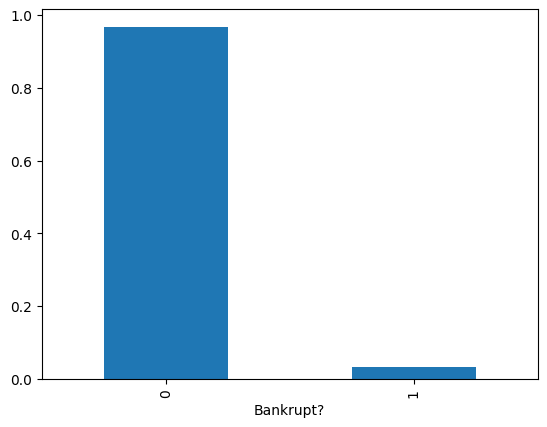

In [7]:
df["Bankrupt?"].value_counts(normalize = True).plot(kind = "bar")
plt.xlabel = "Bankrupt Classes"
plt.ylabel = "Frequency"
plt.title = "Class Balance"

TypeError: 'str' object is not callable

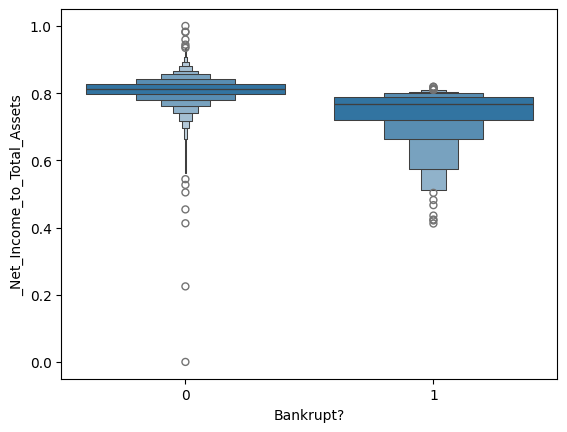

In [8]:
sns.boxenplot( x = "Bankrupt?" ,y = "_Net_Income_to_Total_Assets" ,data = df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class")

In [9]:
df["_Net_Income_to_Total_Assets"].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name: _Net_Income_to_Total_Assets, dtype: float64

TypeError: 'str' object is not callable

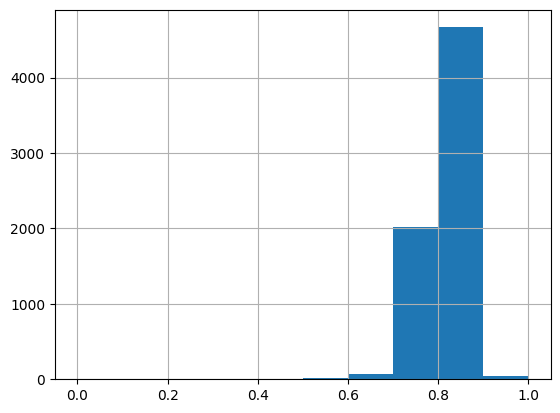

In [10]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("Count")
plt.title("Distribition of Net income to Totol Assets")

TypeError: 'str' object is not callable

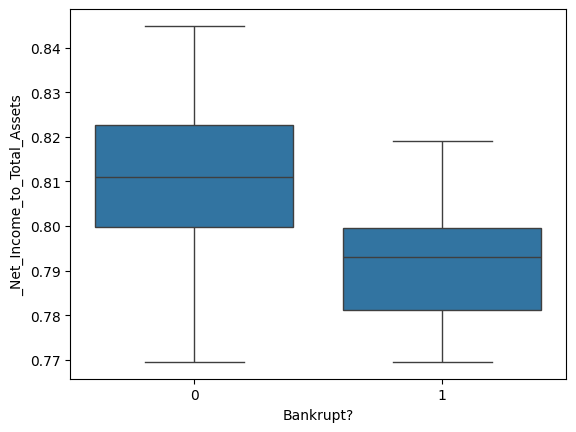

In [11]:
q1,q9 = df["_Net_Income_to_Total_Assets"].quantile([0.1,0.9])
mask = df["_Net_Income_to_Total_Assets"].between(q1, q9)
sns.boxplot(x = "Bankrupt?", y = "_Net_Income_to_Total_Assets", data = df[mask])
plt.xlabel("Bankrupt?")
plt.ylabel("Distribution of Net Income to Total Assets, by Bankruptcy")

<Axes: >

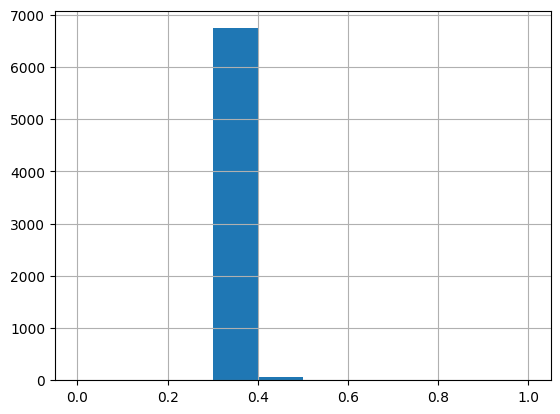

In [12]:
df["_Borrowing_dependency"].hist()

<Axes: >

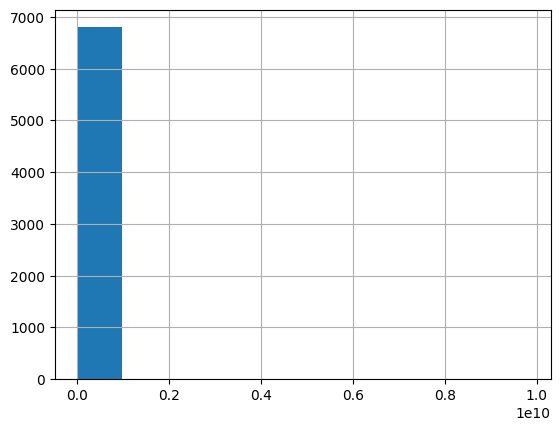

In [13]:
df["_Total_assets_to_GNP_price"].hist()

<Axes: >

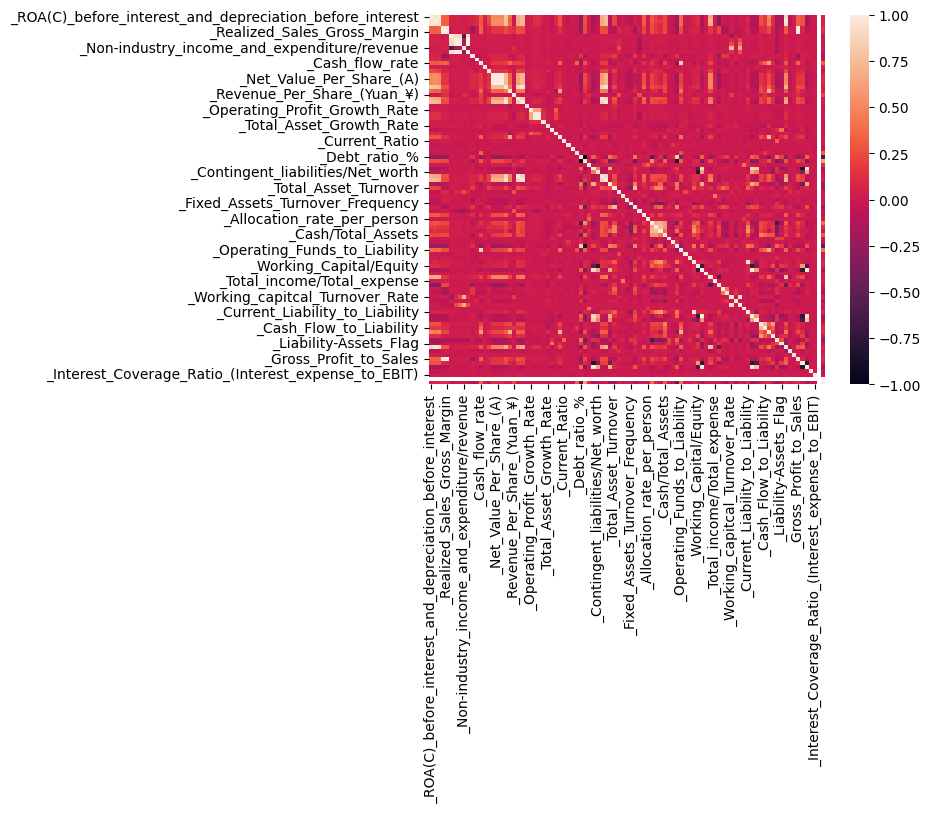

In [14]:
corr = df.drop(columns = ['Bankrupt?']).corr()
sns.heatmap(corr)

In [15]:
target = "Bankrupt?"
X = df.drop(columns = [target])
y = df[target]
X.shape

(6819, 95)

In [16]:
y.shape

(6819,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5455, 95) (5455,) (1364, 95) (1364,)


In [19]:
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape, y_train_over.shape)

(10572, 95) (10572,)


In [20]:
X_train_over.head()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [21]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline,4))

Baseline Accuracy: 0.969


In [22]:
clf = RandomForestClassifier(random_state=42)

In [23]:
params = {"n_estimators" : range(25,100,25),
         "max_depth" : range(10,70,10)}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [24]:
model = GridSearchCV(
    clf,
    param_grid= params,
    cv=5,
    n_jobs = -1,
    verbose= 1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [25]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [26]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,4.101854,0.036465,0.031263,0.001232,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
16,4.106610,0.049751,0.031240,0.004932,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
10,4.078224,0.130326,0.030549,0.004585,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992435,0.995745,0.994797,0.996216,0.995743,0.994987,0.001357,3
17,5.314663,0.256183,0.033103,0.002752,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
14,6.108992,0.111378,0.041409,0.008761,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
11,5.989470,0.051350,0.041869,0.001829,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.992435,0.994799,0.994324,0.995270,0.994324,0.994230,0.000964,6
15,2.098417,0.046244,0.018948,0.001930,60,25,"{'max_depth': 60, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
12,2.070763,0.044583,0.020391,0.001743,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
9,1.978348,0.069984,0.020405,0.002648,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992908,0.994326,0.993851,0.993851,0.994797,0.993946,0.000627,9
8,5.590636,0.131335,0.041531,0.005515,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992435,0.992908,0.993377,0.994324,0.992904,0.993190,0.000641,10


In [27]:
model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [28]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [29]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)
print(f"Training Accuracy: {round(acc_train, 4)}")
print(f"Test Accuracy: {round(acc_test,4)}")

Training Accuracy: 1.0
Test Accuracy: 0.967


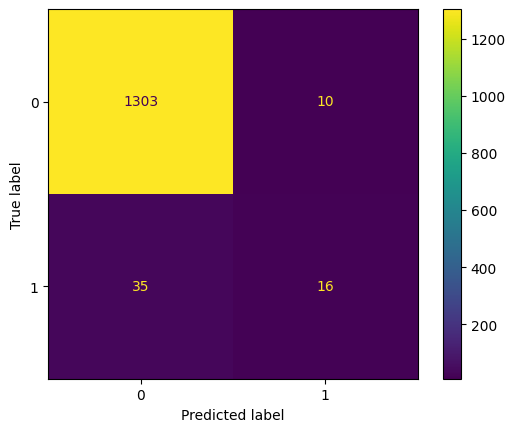

In [30]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test
)

In [32]:
print(classification_report(
    y_test,
    model.predict(X_test)
))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.31      0.42        51

    accuracy                           0.97      1364
   macro avg       0.79      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



In [36]:
features = X_test.columns
importances = model.best_estimator_.feature_importances_

TypeError: 'str' object is not callable

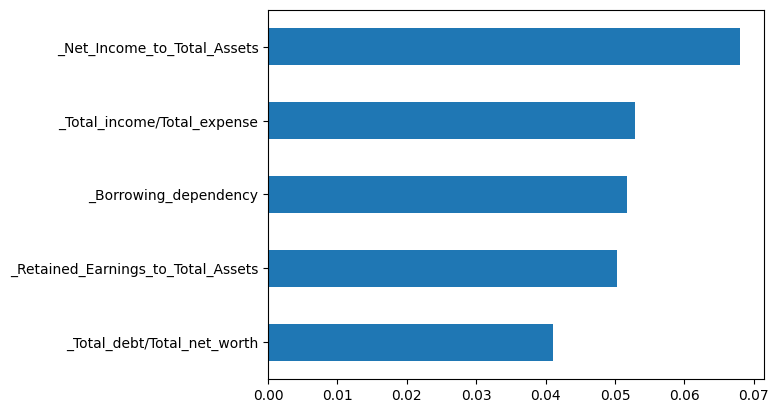

In [38]:
feat_imp = pd.Series(importances, index = features).sort_values()
feat_imp.tail().plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [41]:
with open("model-1", "wb") as f:
    pickle.dump(model,f)